# **Dataset Description:**
#### The dataset used in this project comprises features extracted from network traffic flows, with each flow representing a series of packets transferred between a source and destination. These flows can be categorized into normal network behavior or malicious activity (intrusion)

# **IMPORTING ALL THE NECESSARY LIBRARIES**

In [2]:
# For Data Frame
import numpy as np 
import pandas as pd

# For  Visualtion
import matplotlib.pyplot as plt
import seaborn as sns

# For Modelling
from collections import Counter
from sklearn.preprocessing import StandardScaler 

# Evaluation.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn import metrics


In [3]:
flow_2021=pd.read_csv(r'A:\DAIICT_sem1\classification_learning\Network_Intrusion_Detection\2021.02.15.csv')

# **IMPORTING DATA**

In [4]:
# flow_2021=pd.read_csv(r'2021.02.15.csv')

In [5]:
flow_2021.sample(10)

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
494809,2.666667,329,2383,786,9200.0,5.591189,2,2,6,786,47358.0,1613367029729746,1613367029729718,15163.3050,benign,0.000028
308185,0.000000,0,0,786,47350.0,0.000000,1,0,6,786,9200.0,1613360978072282,1613360978072282,0.0000,benign,0.000000
862007,40.250000,270,191,786,445.0,4.578202,6,7,6,786,5558.0,1613425928659117,1613425928292428,2110.5510,malicious,0.366689
573513,0.000000,0,0,786,50613.0,0.000000,1,1,6,786,445.0,1613368358749721,1613368358637848,0.0000,malicious,0.111873
512794,0.000000,0,699,786,9200.0,5.022600,1,1,6,786,47356.0,1613364018341952,1613364018341424,3510.7970,benign,0.000528
565103,0.000000,0,0,786,47358.0,0.000000,1,0,6,786,9200.0,1613368536207164,1613368536207164,0.0000,benign,0.000000
182766,138.500000,270,191,786,445.0,4.568678,6,6,6,786,14470.0,1613376108762604,1613376107714267,2106.1604,outlier,1.048337
564705,0.000000,0,7644,786,9200.0,3.087754,6,1,6,786,47356.0,1613368555329574,1613368555328901,23602.7950,benign,0.000673
642711,0.000000,0,1448,786,9200.0,4.972262,1,2,6,786,47356.0,1613368298200404,161336829820004,7199.8360,benign,0.000364
451709,0.000000,0,0,786,445.0,0.000000,1,1,6,786,50764.0,1613363841495161,1613363841495161,0.0000,malicious,0.000000


## **Understanding The Columns**

| src_ip | The source IP address associated with the flow. This feature is anonymised to the corresponding Autonomous System |
| --- | --- |
| src_port | The source port number associated with the flow. |
| dest_ip | The destination IP address associated with the flow. The feature is also anonymised in the same manner as before. |
| dest_port | The destination port number associated with the flow |
| protocol | The protocol number associated with the flow. For example TCP is 6 |
| bytes_in | The number of bytes transmitted from source to destination |
| bytes_out | The number of bytes transmitted from destination to source. |
| num_pkts_in | The packet count from source to destination |
| num_pkts_out | The packet count from destination to source |
| entropy | The entropy in bits per byte of the data fields within the flow. This number ranges from 0 to 8. |
| total_entropy | The total entropy in bytes over all of the bytes in the data fields of the flow |
| mean_ipt | The mean of the inter-packet arrival times of the flow |
| time_start | The start time of the flow in seconds since the epoch. |
| time_end | The end time of the flow in seconds since the epoch |
| duration | The flow duration time, with microsecond precision |
| label | The label of the flow, as decided by Tangerine. Either benign, outlier, or malicious |

# **Observing the DataFrame's Columns and Rows** #

In [6]:
print("Total number of Rows in the DataFrame is :",len(flow_2021))
print("Total Number of columns in the DataFrame is : ",len(list(flow_2021.columns)))

Total number of Rows in the DataFrame is : 878526
Total Number of columns in the DataFrame is :  16


In [7]:
flow_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878526 entries, 0 to 878525
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        878526 non-null  float64
 1   bytes_in       878526 non-null  int64  
 2   bytes_out      878526 non-null  int64  
 3   dest_ip        878526 non-null  int64  
 4   dest_port      875764 non-null  float64
 5   entropy        878526 non-null  float64
 6   num_pkts_out   878526 non-null  int64  
 7   num_pkts_in    878526 non-null  int64  
 8   proto          878526 non-null  int64  
 9   src_ip         878526 non-null  int64  
 10  src_port       875764 non-null  float64
 11  time_end       878526 non-null  int64  
 12  time_start     878526 non-null  int64  
 13  total_entropy  878526 non-null  float64
 14  label          878526 non-null  object 
 15  duration       878526 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 107.2+ MB


# **VISUALISATIONS**

C:\Users\91951\AppData\Local\Temp\ipykernel_16720\1873958844.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=flow_2021, saturation=0.7, palette=['#7fccb6','#74a7b2','#8faff2'])


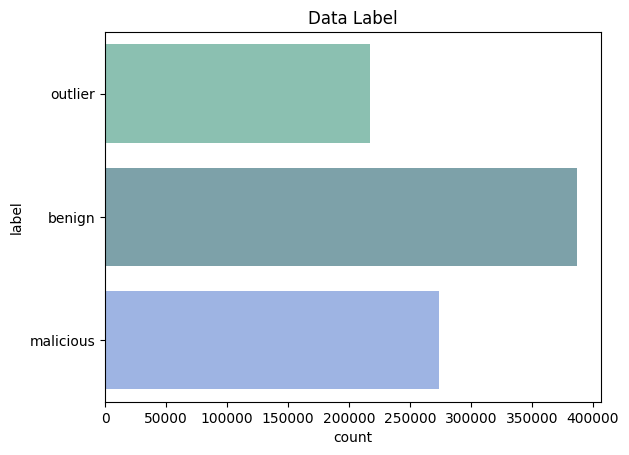

In [8]:
sns.countplot(y='label', data=flow_2021, saturation=0.7, palette=['#7fccb6','#74a7b2','#8faff2'])
plt.title('Data Label')
plt.show()

### **CORRELATION HEATMAP**

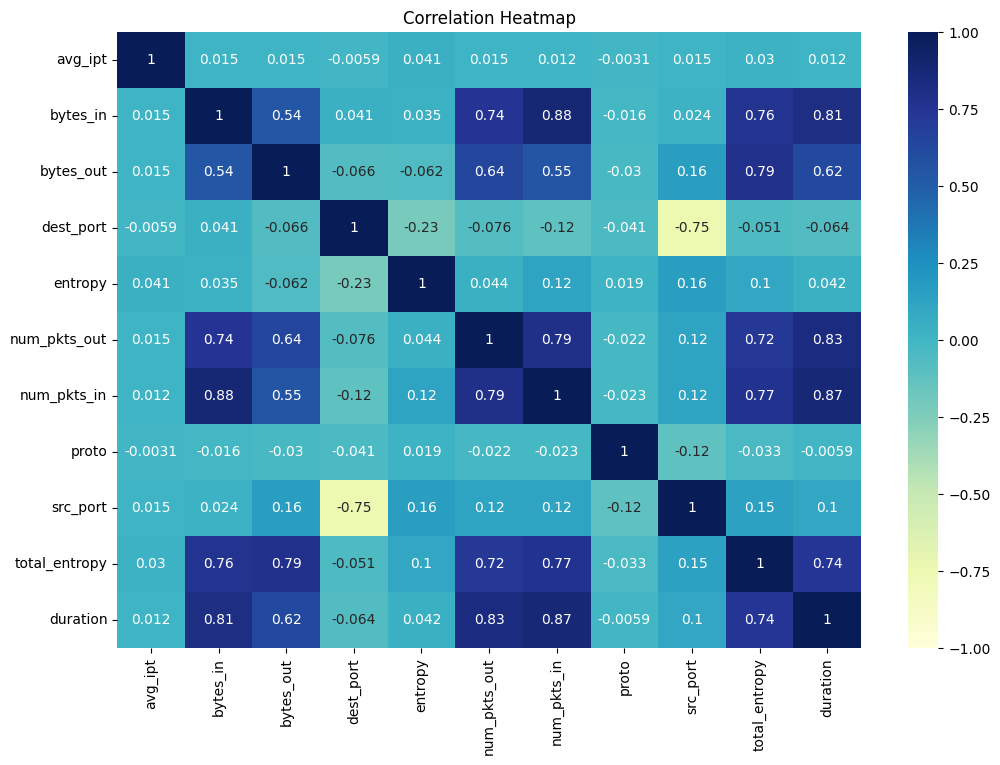

In [14]:
# Correlation heatmap. 
plt.figure(figsize=(12, 8)) # Plot size. 
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

## **Removing the Null Rows and unnecessary Columns Based on Visualization and Domain Knowledge** 

In [10]:
flow_2021.dropna(inplace=True)

In [11]:
# Remove the unnecessary columns. 
flow_2021.drop(["src_ip","dest_ip","time_end","time_start"],axis=1, inplace=True)

In [12]:
flow_2021['label'].value_counts()

label
benign       387301
malicious    271570
outlier      216893
Name: count, dtype: int64

# **Separating the Data into X and Y axis**

In [13]:
#Separating the data.
X = flow_2021[['avg_ipt','bytes_in','bytes_out','dest_port','entropy','num_pkts_out',
        'num_pkts_in','proto','src_port','total_entropy','duration']]
y = flow_2021['label']

# *Label Encoding the Y-Axis*

In [15]:
# Setting a dictionary to encode the label.
mapping = {'benign': 1, 'malicious': 0, 'outlier': 2}

In [16]:

y_true = [mapping[x] for x in y]

In [17]:
counted_values = Counter(y_true)
print(counted_values)

Counter({1: 387301, 0: 271570, 2: 216893})


# **Importing all Required Model** #

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

### **Splitting The Data set into Train and Test**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=42,stratify=y_true)

### **Training the model using DecisionTree and Finetuning the model using GridSearchCV**

In [20]:
from sklearn.tree import DecisionTreeClassifier
from random import randint
dt = DecisionTreeClassifier()

parameters = {'max_depth': [2,5,6,7], 'min_samples_split': [2,4,6,9], 'min_samples_leaf': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy']}

random_search = RandomizedSearchCV(dt, param_distributions=parameters, n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

c:\Users\91951\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 9]})

# *Predicting The flow Type* based on decision Tree Model

In [21]:
from sklearn import metrics
y_dt = random_search.predict(X_train)
y_pred_dt = random_search.predict(X_test)

### *Plotting the Evaluation Metrice for Decision Tree*

In [22]:
from sklearn.metrics import classification_report

# generate classification report
target_names = ['0', '1','2']
print(classification_report(y_test, y_pred_dt, target_names=target_names))
# Accuracy
print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_dt))
print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76     67893
           1       0.99      1.00      1.00     96825
           2       0.72      0.57      0.63     54223

    accuracy                           0.84    218941
   macro avg       0.81      0.79      0.80    218941
weighted avg       0.84      0.84      0.83    218941

Accuracy on Training set:  0.8356924163739698
Accuracy on Testing set:  0.835640652047812


In [24]:
confusion_matrix(y_test, y_pred_dt)

array([[55485,   438, 11970],
       [   22, 96735,    68],
       [23425,    62, 30736]])

### *Training the model using XgBoost and Finetuning the model using GridSearchCV*

In [25]:
# XGBoost with GridSearchCV
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7]},
             scoring='accuracy')

In [26]:
xgb_best_model = xgb_grid.best_estimator_

### *Plotting the Evaluation Metrice for XGBoost*

In [82]:
# XGBoost Evaluation
xgb_pred = xgb_grid.predict(X_test)
report = classification_report(y_test, xgb_pred)
print(f'XGBoost Report:\n {report}')

XGBoost Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     67893
           1       1.00      1.00      1.00     96825
           2       0.88      0.77      0.82     54223

    accuracy                           0.92    218941
   macro avg       0.90      0.89      0.90    218941
weighted avg       0.92      0.92      0.92    218941



### *Plotting the Confusion Matrix for XGboost*

In [83]:
confusion_matrix(y_test, xgb_pred)

array([[62244,    12,  5637],
       [   14, 96811,     0],
       [12567,     0, 41656]])

### *Understanding the Importacne of Each Feature*

In [101]:
l1=list(X_train.columns)
l2 = list(xgb_best_model.feature_importances_)
feat_imp=pd.DataFrame(l1,l2)

In [102]:
feat_imp

,0
0.018093,avg_ipt
0.044497,bytes_in
0.031394,bytes_out
0.525385,dest_port
0.046276,entropy
0.013332,num_pkts_out
0.010343,num_pkts_in
0.109598,proto
0.117142,src_port
0.054305,total_entropy


### *Training the model using RandomForest and Finetuning the model using GridSearchCV*

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_leaf=20)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=200)

### *Plotting the Evaluation Metrice for XGBoost*

In [29]:
y_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report

# generate classification report
target_names = ['0', '1','2']
print(classification_report(y_test, y_pred_rf, target_names=target_names))
# Accuracy
print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_rf))
print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71     67893
           1       0.99      1.00      1.00     96825
           2       0.64      0.65      0.64     54223

    accuracy                           0.82    218941
   macro avg       0.78      0.78      0.78    218941
weighted avg       0.82      0.82      0.82    218941

Accuracy on Training set:  0.8184290136003155
Accuracy on Testing set:  0.8190973823998247


In [30]:
confusion_matrix(y_test, y_pred_rf)

array([[47407,   498, 19988],
       [   39, 96780,     6],
       [19010,    66, 35147]])